# In this notebook we will primarily study loan application status prediction with 4 different techniques -
1. Decision Trees
2. Random Forests
3. Boosting - AdaBoost
4. Logistic Regresssion

**1) Decision Tree Classifier:**

**Section 1**: Introduction (5 points)

**Problem Statement:**: Loan Approval Status Prediction (Classification: 0: Loan Denied, 1: Loan Approved ) using Decision Tree Classifier

**Data Description:** : We use the following data: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv for the analysis and loan approval prediction. The dataset has some categorical and some numerical attributes based on which we will predict the loan status.

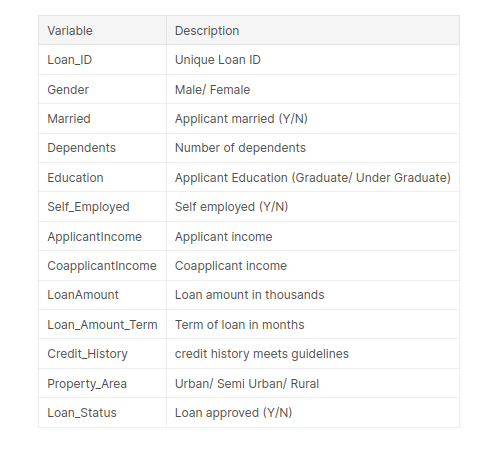

We are referring for the code to: https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook

**Section 2**: **Implementation - Code and Notes**

In [1]:

# Importing Libraries
import pandas as pd

train_df = pd.read_csv('LoanTrain.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



    We can see there are total 13 columns including target variable, all of them are self explanatory.
    We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns


In [2]:
# Count number of Categorical and Numerical Columns

#Dropping Loan ID as it is detrimental to our decision tree classifier
train_df = train_df.drop(columns=['Loan_ID'])
train_df = train_df.dropna()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print("Categorical columns: ", categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Numerical Columns: ", numerical_columns)

Categorical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']



Analyze values assigned to columns


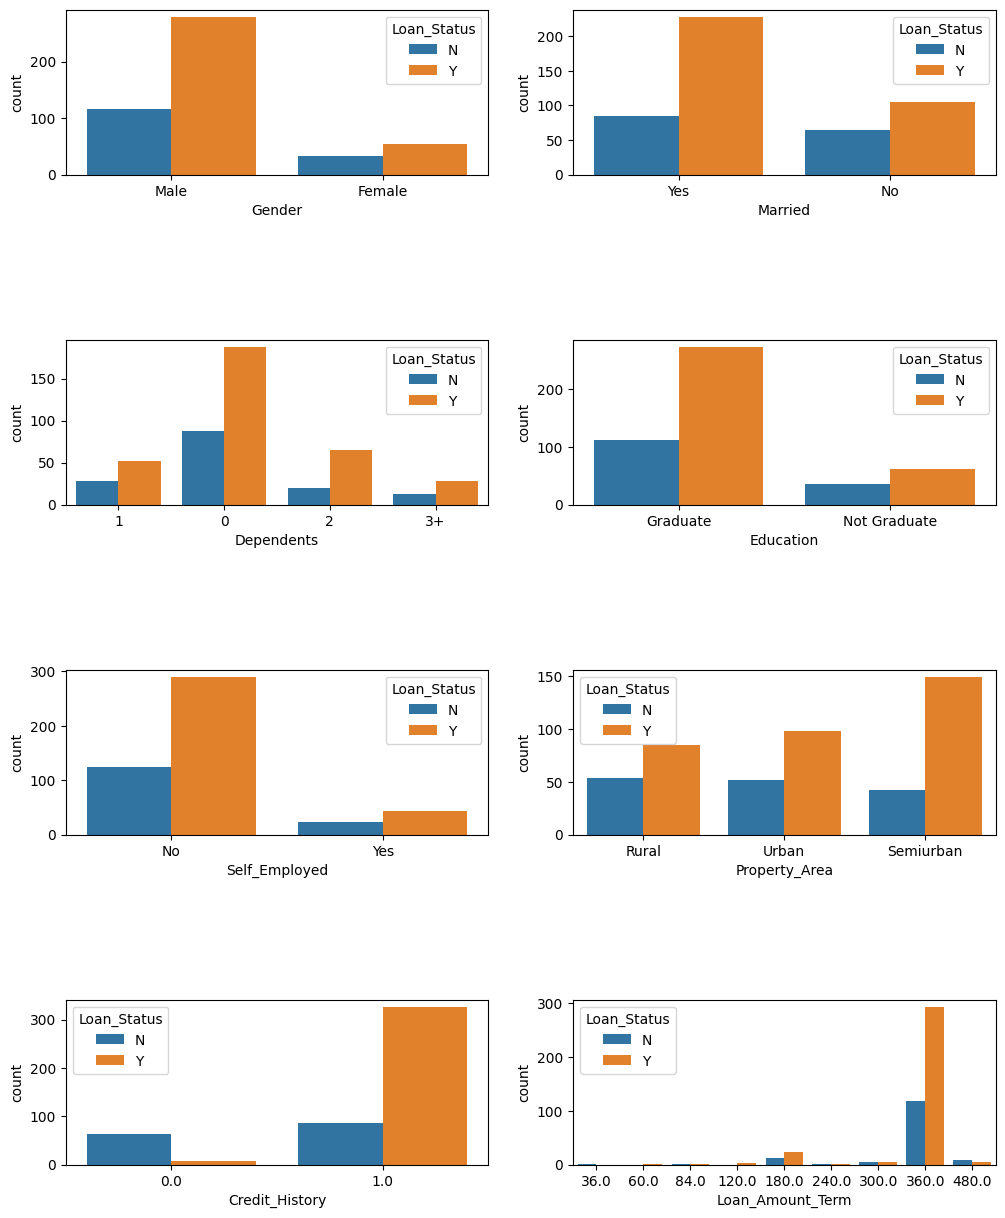

In [3]:
# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Plot the bar charts for categorical attributes
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)


Plots above convey following things about the dataset:

    
1.   Loan Approval Status: About 2/3rd of applicants have been granted loan.
2.   Sex: There are more Men than Women (approx. 3x)
3.   Martial Status: 2/3rd of the population in the dataset is Married;
4.   Married applicants are more likely to be granted loans.
5.   Dependents: Majority of the population have zero dependents and are   also likely to accepted for loan.
6.   Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
7.   Employment: 5/6th of population is not self employed.
8.   Property Area: More applicants from Semi-urban and also likely to be granted loans.
9. Applicant with credit history are far more likely to be accepted.
    Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).


    
    
    
    
    
    
    

Now, let's also analyze Numerical Columns:


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       480.000000         480.000000  480.000000
mean       5364.231250        1581.093583  144.735417
std        5668.251251        2617.692267   80.508164
min         150.000000           0.000000    9.000000
25%        2898.750000           0.000000  100.000000
50%        3859.000000        1084.500000  128.000000
75%        5852.500000        2253.250000  170.000000
max       81000.000000       33837.000000  600.000000


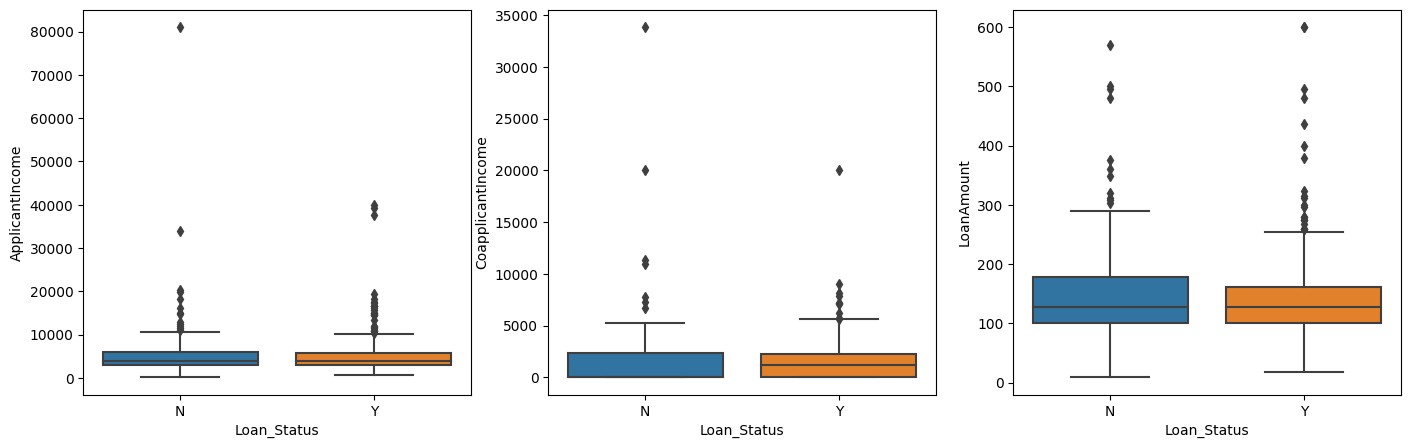

In [4]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

Preprocessing Data:Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

    Encoding Categorical Features.
    Removing missing values




For Numerical Columns, there is no significant visually discernible relation to Loan approval status.


In [5]:
# Encoding categrical Features: #
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [6]:
# Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

# Splitting into Train -Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
# Handling/Imputing Missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

**Decision tree classifier**

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)


**Section 3: Analysis** (10 points)

In [8]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.653667259615668
Validation Mean Accuracy:  0.6899863294600137


As we can see, the decision tree classifier is behaving extremely good on the training data but relatively poor on the test data. This is the sign for possible overfitting.

We will try to tune the maximum depth (ie we will use tree pruning) of the decision tree to reduce the overfitting

<Axes: xlabel='Max_Depth', ylabel='Values'>

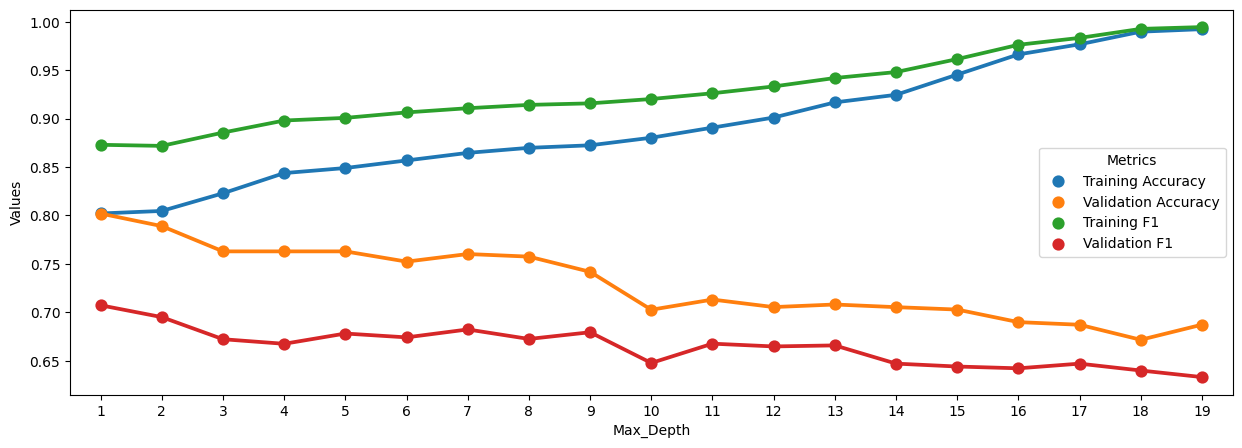

In [9]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)


Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)



From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

Visualizing Decision Tree with Max Depth = 3

In [10]:
import graphviz
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

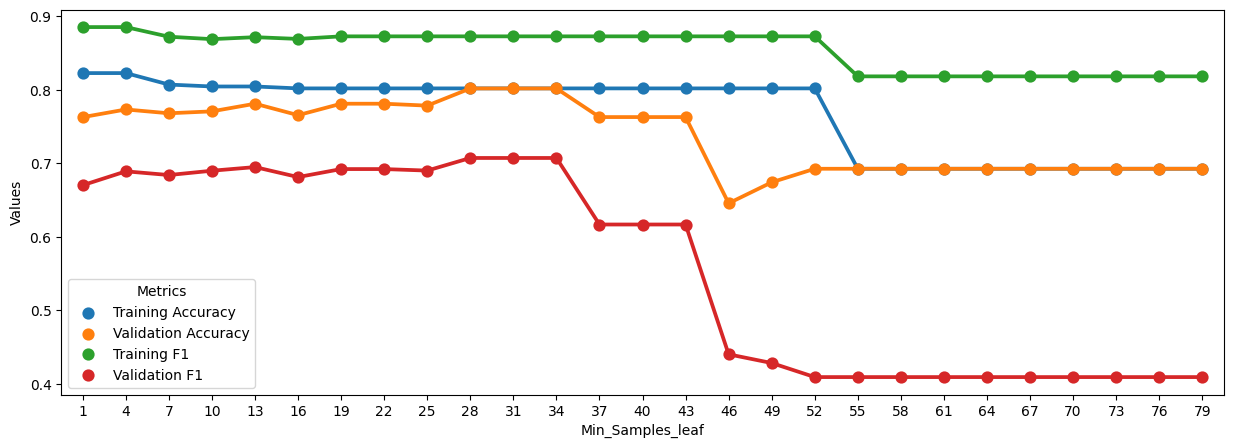

In [11]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np

# finding optimal value of min_sample_leaf parameter to avoid overfitting
for samples_leaf in range(1,80,3): # Sweeping from 1% samples to 10% samples per leaf
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)


Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)



From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [12]:
# Using the tree depth as 3 and min_sample leaf parameter as 35
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

Test Accuracy:  0.8333333333333334
Test F1 Score:  0.8888888888888888


As we can see after the hyper parameter tuning,
Test accuracy improved from 0.69 to 0.85 and F1 score improved from 0.63 to 0.90. We can conclude that we have significant;y reduced the overfitting with the hyperparameter tuning (Tree prunning).



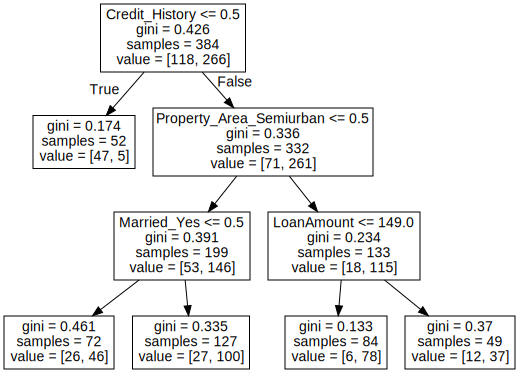

In [13]:
# We can visualize the final decision tree
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

In [14]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,16,14,30
1,2,64,66
All,18,78,96


As we can see in the confusion matrix we are correctly accepting the 84 loan applications while we are correctly rejecting the 21 loan applications. 17 applications are mistakenely getting accepted while only 1 application is being mistakenly rejected. This shows that we are willing to make a mistake while accepting an application but we are highly cautious while rejecting an application.



**Pros of the models:**

1.  Decision trees are extremely easy to understand and interpret for a human mind. We can observe this from the visualization of our decision tree.
2.  Decision trees are robust to ourliers
3.  Decision trees can handle missing values(using majority voting)
4.  Decision trees are non linear
5.  Some versions of decision trees can learn continuously as data becomes available and modify their structure (Similar to Reinforcement learning)

**Cons of the models:**
1.  Decision trees are quick to overfit as we can see in our example. They require careful hyperparameter tuning/ Tree prunning to resilve the issue.
2.  Decision trees are not continous and hence when our attrubutes are continuous and when we modify them to be used in the decision tree classifier we loose information.
3.  Decision trees can oversimplify a decision
4.  Decision trees are biased towards majority class
5.  Training decision trees can be time consuming

**2) Random Forests Classifier:**

**Problem Statement:**: Loan Approval Status Prediction (Classification: 0: Loan Denied, 1: Loan Approved ) using Random Forests Classifier

**Data Description:** : We use the following data: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv for the analysis and loan approval prediction. The dataset has some categorical and some numerical attributes based on which we will predict the loan status. We are using the same data as the models above. Hence we will not repeat the data cleaning process and use the data directly.

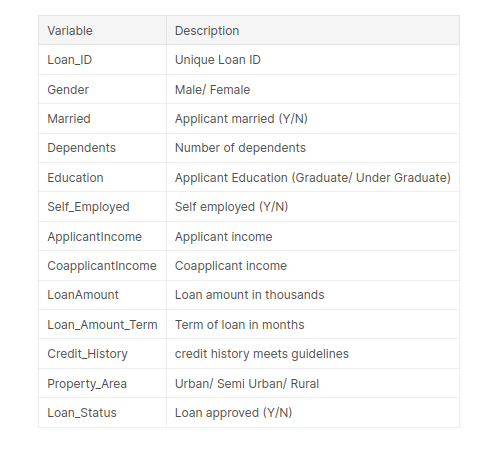

We are referring for the code to: https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook

**Section 2**: **Implementation - Code and Notes**

In [15]:
# import the random forests classifier
from sklearn.ensemble import RandomForestClassifier

# training the classifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)

# fitting the classifier on same data as in model 1
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10)

**Section 3: Analysis** (10 points)

In [16]:
y_pred = rf_clf.predict(X_train)
# training metric
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

# test metric
print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8729096989966555
Train Accuracy  0.8020833333333334
Validation Mean F1 Score:  0.6846638168942075
Validation Mean Accuracy:  0.7993848257006152


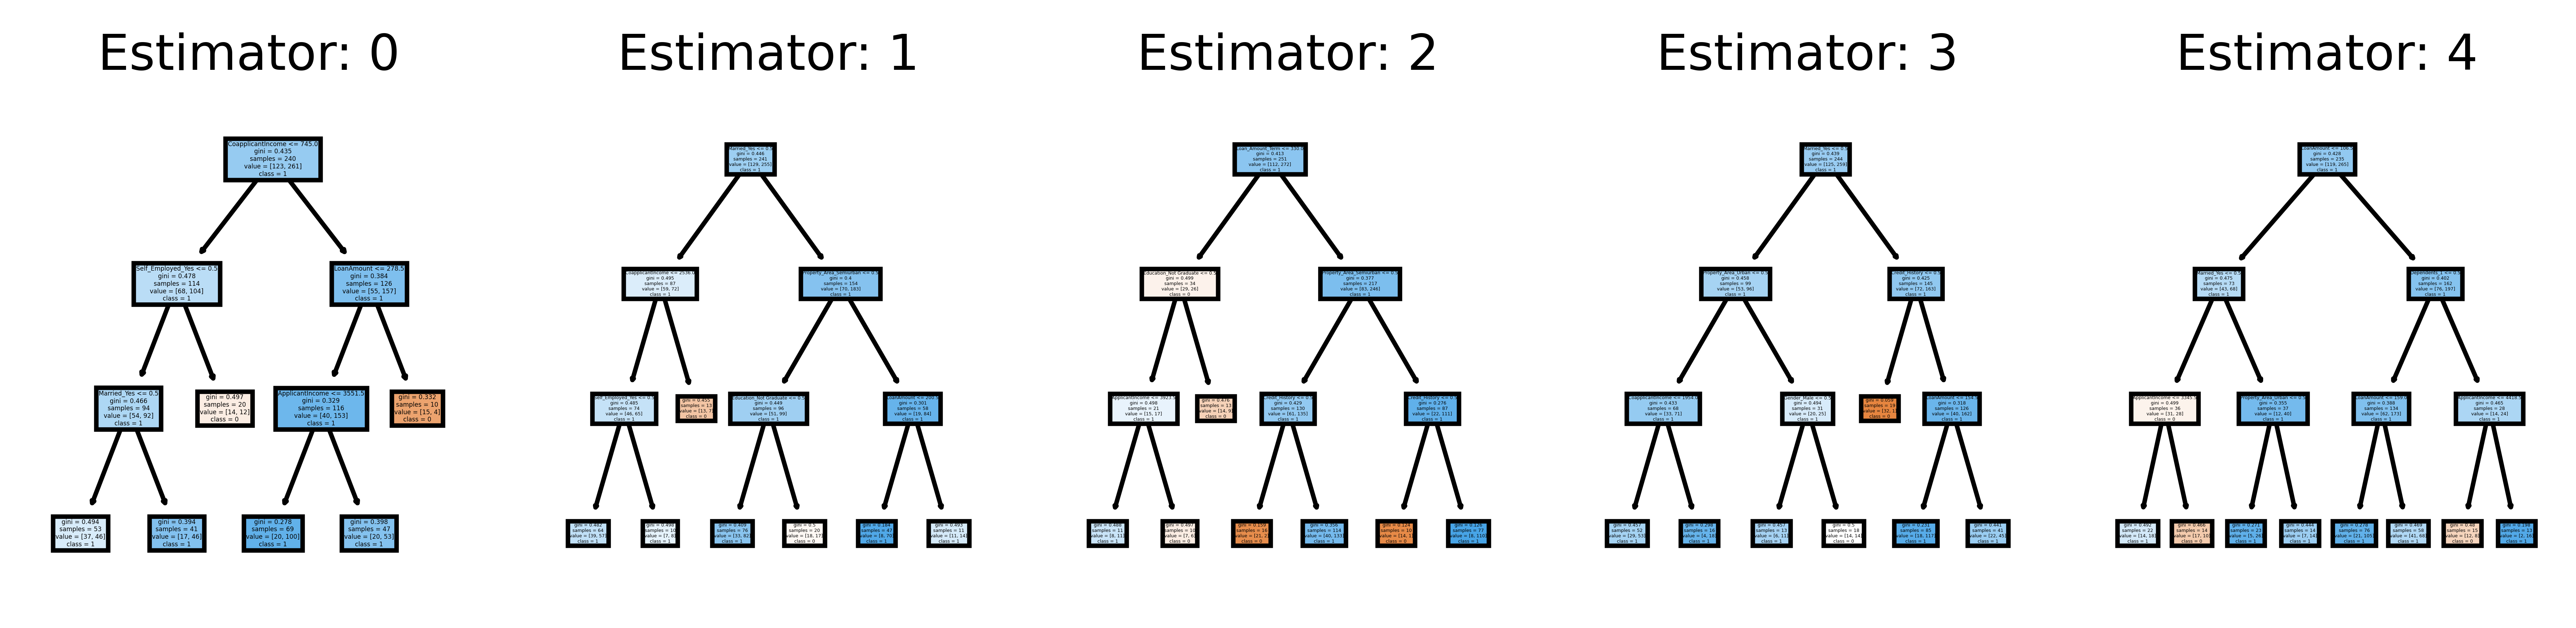

In [17]:
# We can visualize first 5 decision trees inside the random forests as follows
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

# This may not the best way to view each estimator as it is small
fn=X.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf_clf.estimators_[index],
                   feature_names = fn,
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')





Random Forest: Test Data Evaluation


In [18]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))


Test Accuracy:  0.84375
Test F1 Score:  0.896551724137931


Random forests gives same results as decision tree classifier. It shows 85% accuracy on the test data and F1-score of 0.90 on the test data. The confusion matrix is also same.

**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

In [19]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,16,14,30
1,1,65,66
All,17,79,96


As we can see in the confusion matrix we are correctly accepting the 84 loan applications while we are correctly rejecting the 21 loan applications. 17 applications are mistakenely getting accepted while only 1 application is being mistakenly rejected. This shows that we are willing to make a mistake while accepting an application but we are highly cautious while rejecting an application.



**Pros of the models:**

1.  Random forests can take advantage of parallel computing to train multiple decision trees faster
2.  Random forests are robust to ourliers
3.  Random forests implicitely perform feature selection and generate uncorrelated decision trees. They avoid overfitting most of the times.
4.  Random forests are computationally effective when dealing with large number of input features as compared to simple decision trees
5.  Random forests can handle both linear and non linear relationships
6.  Random forests can be used for both regression and classification tasks
7. Random forests generally provide high accuracy and balance the bias variance tradeoff well


**Cons of the models:**
1.  Random forests are not easily interpretable.
2.  Random forests can be computationally intensive for large datasets
3.  Random forest is like black box algorithm, you have very little control over what the model does
4.  Random forests can't predict any value outside the available(during training) values

**3) Boosting:**

**Problem Statement:**: Loan Approval Status Prediction (Classification: 0: Loan Denied, 1: Loan Approved ) using AdaBoost(A boosting algorithm) Classifier.

**Data Description:** : We use the following data: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv for the analysis and loan approval prediction. The dataset has some categorical and some numerical attributes based on which we will predict the loan status. We are using the same data as the models above. Hence we will not repeat the data cleaning process and use the data directly.

We are refreiing to the documentation of sklearn for this code - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

**Section 2**: **Implementation - Code and Notes**

<Axes: xlabel='NumEstimators', ylabel='Values'>

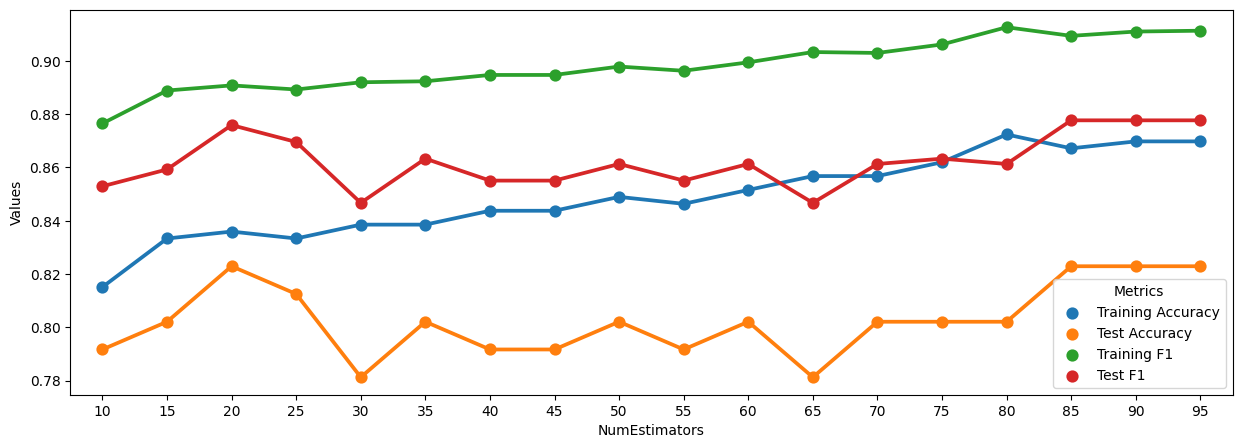

In [27]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
# suppressing the warnings
warnings.filterwarnings('ignore')

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []


for n in range(10, 100, 5):
    ada_clf = AdaBoostClassifier(n_estimators=n, random_state=0)
    ada_clf.fit(X_train,y_train)

    y_pred_train = ada_clf.predict(X_train)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)


    y_pred_test = ada_clf.predict(X_test)

    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)

    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)

# plotting the training and testing accuracy and f1 score
ada_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "NumEstimators": [x for x in range(10, 100, 5)]}
ada_logreg_df = pd.DataFrame.from_dict(ada_logreg)

plot_df = ada_logreg_df.melt('NumEstimators',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="NumEstimators", y="Values",hue="Metrics", data=plot_df,ax=ax)

**Section 3: Analysis** (10 points)

As we can see in the plot the ideal number of estimators in the ada boost should be around 20. After that overfitting is occuring.

In [21]:
ada_clf = AdaBoostClassifier(n_estimators=20, random_state=0)
ada_clf.fit(X_train,y_train)
y_pred_test = ada_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.84375
Test F1 Score:  0.896551724137931
Confusion Matrix on Test Data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Predicted,0,1,All
True,,,
0,16,14,30
1,1,65,66
All,17,79,96


**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

AdaBoost model's accuracy is 83% and f1 score of 88%. This performance is similar to the random forest model(bagging approach). This indiactes that the two approaches of ensemble learning have similar performance eon our data.

The confusion matrix is also similar with 16 examples are correctly classified as class 0, while 64 examples are correctly classified as class1. 14 examples are incorrectly classfied as class 1 while only 2 examples are incorrectly classified as class 0. This means our model prefers to give loans(classifying as class1) over denying the loan which is what generally the banks do.

**Pros of the models:**

1.  As boosting is an ensemble method it generally offers improved accuracy and performance over single models.
2.  Boosting is useful for modelling complex and noisy data
3.  Boosting can reduce the risk of overfitting by balancing bias-variance tradeoff
4.  Boosting can handle mariad types of tasks ranging from classification, regression, clusterring, anamoly detection just by using different type of base models.
5. These models can provide more confidence and reliability by providing confidence intervals and error estimated for the predictions.


**Cons of the models:**
1.  Boosting is computationally expensive and time consuming due to need for processing and storing many base models(weak learners)
2.  Boosting increases complexity and memory requirements of the system
3.  Boosting models can be difficult to interpret and explain as they involve multiple layers of abstraction and aggregation, which can obscure the logic and reqasonning behind the predictions
4.  Boosting models can lead to underfitting or overfitting if base models are too weak or too strong or if the aggrigation method is too simple or too complex.
5. Boosting models can be sensitive to the quality and diversity of the data and the base models as they depend on assumptions and limitations of the individual models and representativeness and independence of the data sample an d features.

**4) Logistic Regression Classifier:**

**Problem Statement:**: Loan Approval Status Prediction (Classification: 0: Loan Denied, 1: Loan Approved ) using Logistic Regression Classifier

**Data Description:** : We use the following data: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv for the analysis and loan approval prediction. The dataset has some categorical and some numerical attributes based on which we will predict the loan status. We are using the same data as the models above. Hence we will not repeat the data cleaning process and use the data directly.

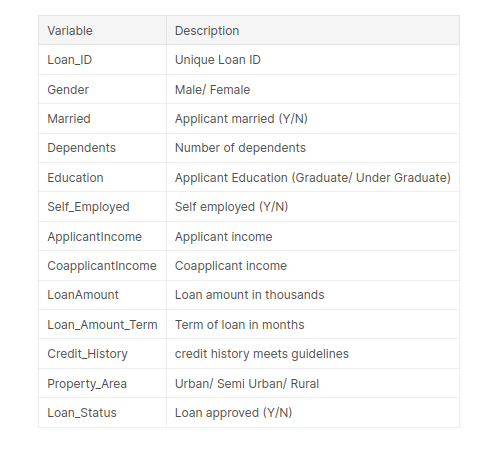

We are referring for the code to: https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook

**Section 2**: **Implementation - Code and Notes**

<Axes: xlabel='Decision Threshold', ylabel='Values'>

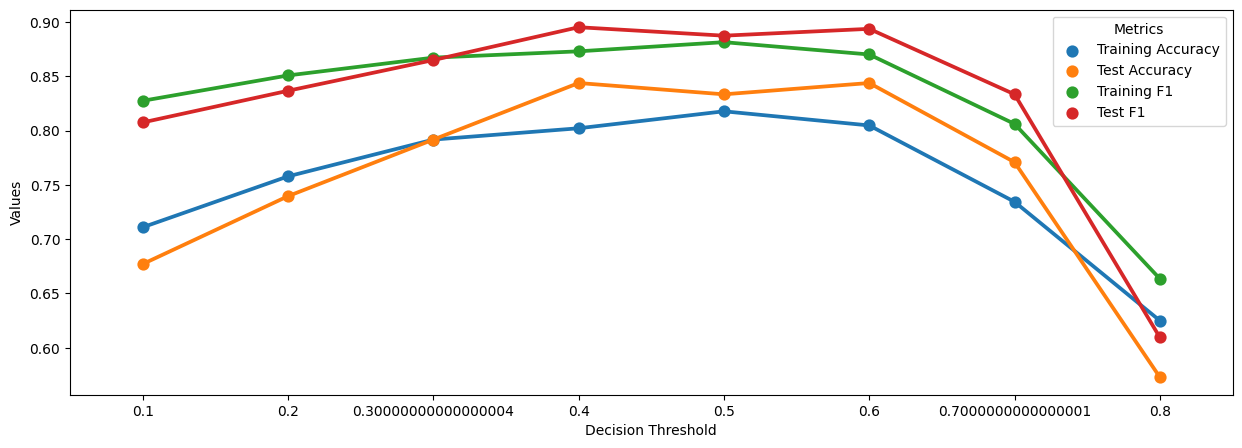

In [22]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []


# training the logistic regression classifiers for different threshold and
# plotting the training and testing accuracy and F1-score to identify overfitting
# when for some threshold, the accuracy and F1 score are much more for training data than on tetsing data
# then it is the sign of overfitting
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)

    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)

    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)

    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)

    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

# plotting the training and testing accuracy and f1 score
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)
plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)



**Section 3: Analysis** (10 points)

Logistic Regression does slightly better than Decision Tree and Random Forest.
Based on the above Test/Train curves, we can keep threshold to 0.4.
Now Finally let's look at Logistic Regression Confusion Matrix

In [23]:
thresh = 0.4 # Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.84375
Test F1 Score:  0.8951048951048951
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,17,13,30
1,2,64,66
All,19,77,96


Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier. In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of 86 %

**Discussion:** Delve into the pros and cons of the model, commenting on potential
overfitting, or other relevant observations

The confusion matrix is also similar with 17 examples are correctly classified as class 0, while 64 examples are correctly classified as class1. 13 examples are incorrectly classfied as class 1 while only 2 examples are incorrectly classified as class 0. This means our model prefers to give loans(classifying as class1) over denying the loan which is what generally the banks do.

**Pros of the models:**

1.  Logistic regression is easy to implement and yet efficient in training
2.  Performs well on low dimensional data
3.  It is very efficient when the dataset has features that are linearly seperable
4.  It can output well-calibrated probabilities along with classification results
5.  The predicted parameters give inference about the importance of each fauture


**Cons of the models:**
1.  Logistic regression overfits on high dimensional data
2.  Assumes linear separation between classes
3.  Logistic regression may not be accurate if sample size is too small
4.  Logistic regression can't solve non linear problems and it fails to capture complex relationships.
5.  Logistic regression requires average or no multicollinearity between independent variables